Import the numpy and pandas packages

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import warnings
warnings.filterwarnings('ignore')

Data inspection

In [237]:
fare = pd.read_excel(r'E:\Python_ML_projects\Project 3_Flight price/Data_Train.xlsx')
fare.head(15)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [238]:
fare.shape

(10683, 11)

In [239]:
fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Checking null values

In [240]:
fare.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Removing null values and unwanted columns

In [241]:
fare['Route'] = fare['Route'].fillna(fare['Route'].mode()[0])
fare['Total_Stops'] = fare['Total_Stops'].fillna(fare['Total_Stops'].mode()[0])



In [242]:
fare.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [243]:
fare.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


<AxesSubplot:>

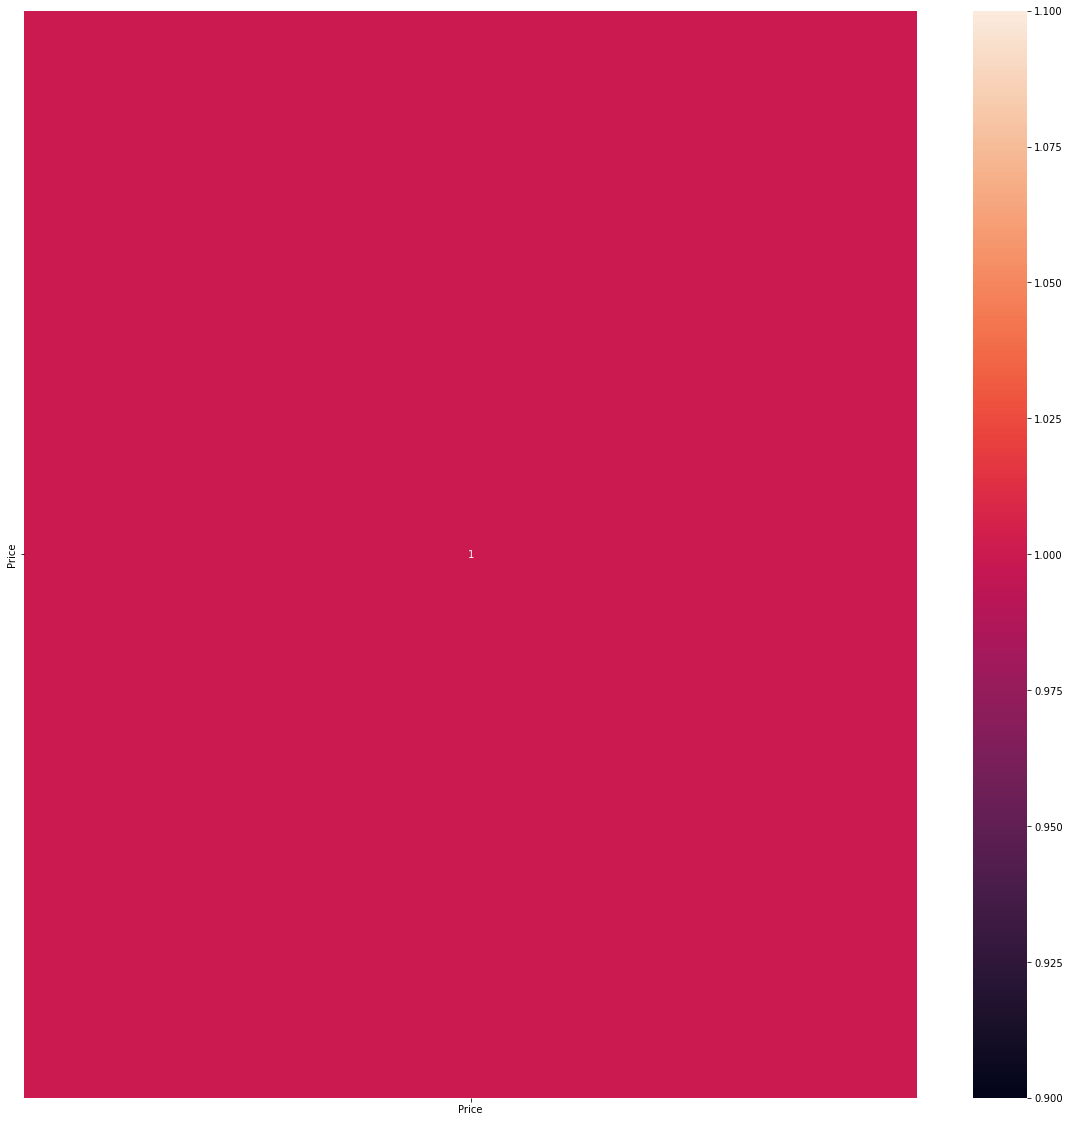

In [244]:
plt.figure(figsize=(20,20))
sns.heatmap(fare.corr(),annot=True)

In [245]:
data=fare.copy()
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [246]:
data.dtypes


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [247]:
def change_into_datetime(col): 
    data[col]=pd.to_datetime(data[col])

In [248]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(feature)

In [249]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [250]:
data['Journey_day']=data['Date_of_Journey'].dt.day
data['Journey_month']=data['Date_of_Journey'].dt.month
data['Journey_year']=data['Date_of_Journey'].dt.year

In [251]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-08-09 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-08-09 05:50:00,2022-08-09 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [252]:
def extract_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [253]:
extract_hour_min(data,'Dep_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-08-09 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [254]:
extract_hour_min(data,'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [255]:
def flight_dep_time(x):
    if(x>4)and(x<=8):
               return'EARLY MORNING'
               
    elif(x>8)and(x<=12):
               return'MORNING'
        
    elif(x>12)and(x<=16):
               return'AFTERNOON'
        
    elif(x>16)and(x<=20):
               return'EVENING'
        
    elif(x>20)and(x<=24):
               return'NIGHT'
        
    else:
               return'LATE NIGHT'

<AxesSubplot:>

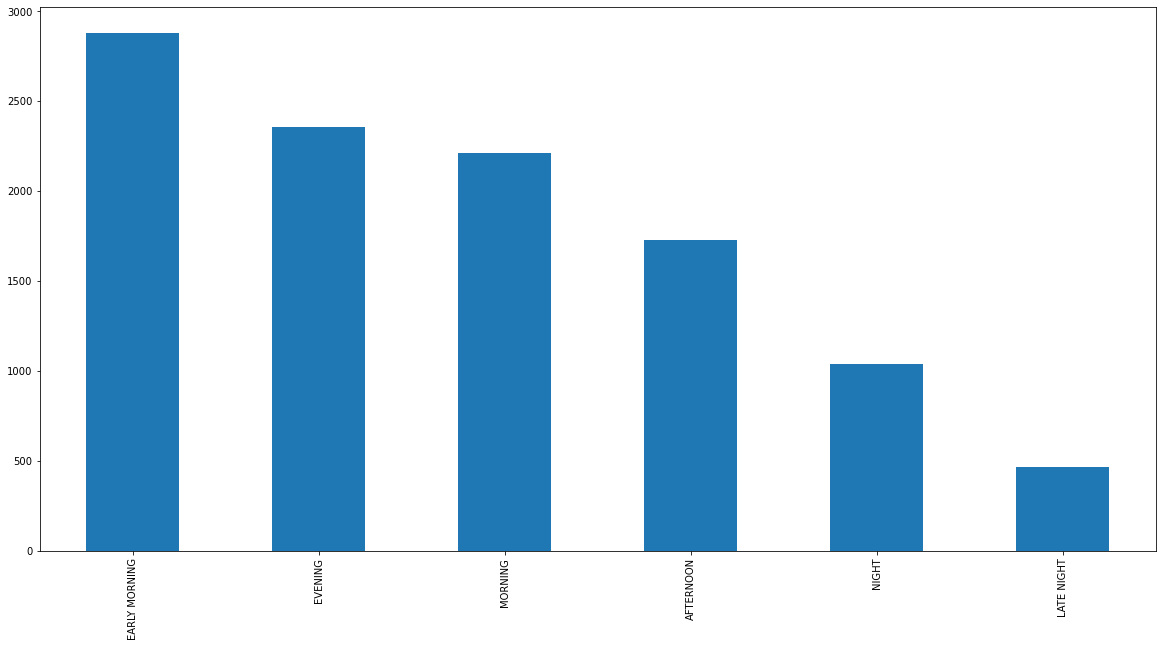

In [256]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

In [257]:
!pip install plotly

In [258]:
!pip install cufflinks

In [259]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [260]:
cf.go_offline()

In [261]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

In [262]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h'+x
        
    elif 'm' not in x:
        x=x+'0m'
        
        return x

In [263]:
data['Duration'].apply(preprocess_duration)

0         None
1         None
2        19h0m
3         None
4         None
         ...  
10678     None
10679     None
10680     3h0m
10681     None
10682     None
Name: Duration, Length: 10683, dtype: object

In [264]:
data['Duration'][0].split(' ')[0]

'2h'

In [265]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [266]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [267]:
data['duration_hours']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [268]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hours
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25,19


In [269]:
data['duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [270]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hours,duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25,19,1140


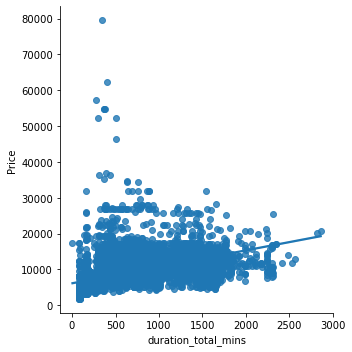

In [271]:
sns.lmplot(x='duration_total_mins',y='Price',data=data)

<AxesSubplot:ylabel='Destination'>

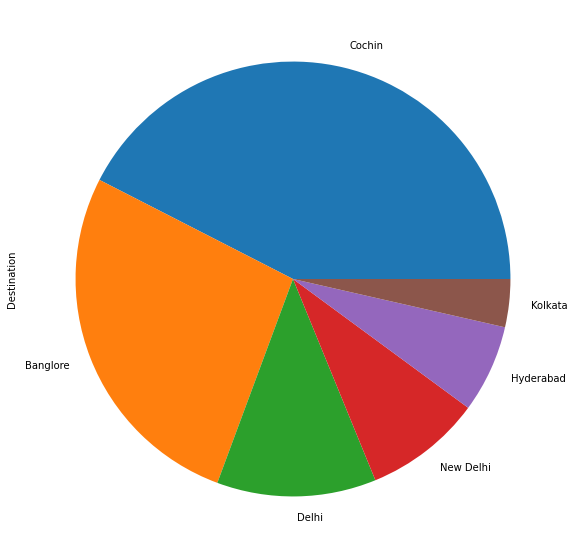

In [272]:
data['Destination'].unique()
data['Destination'].value_counts().plot(kind='pie')

In [273]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10683, dtype: object

In [274]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

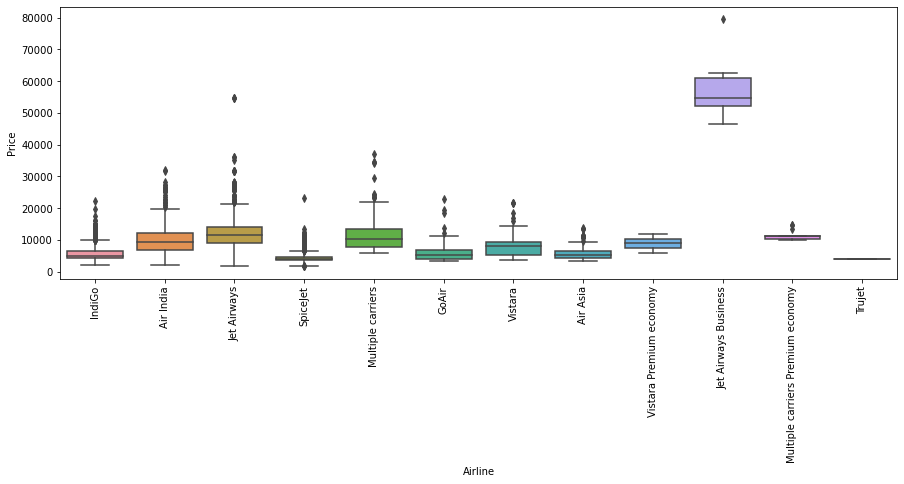

In [275]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

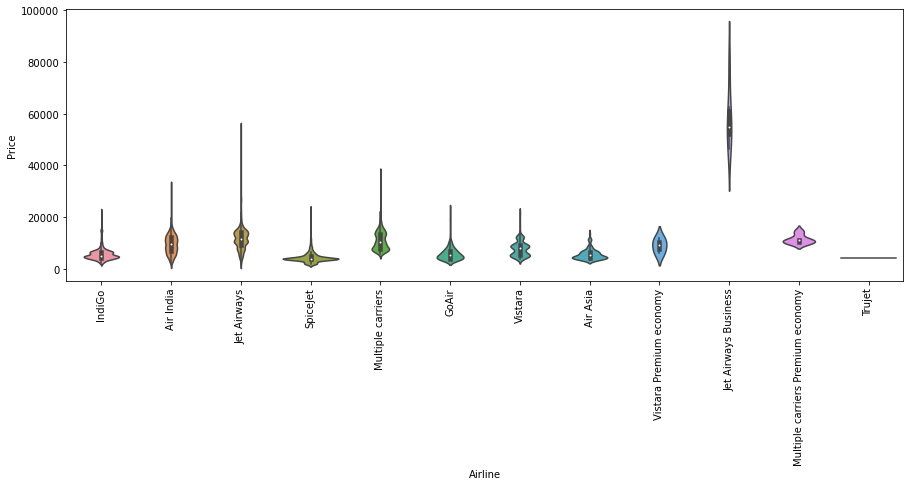

In [276]:
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

In [277]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [278]:
data.drop(columns=['Additional_Info','Route','duration_total_mins','Journey_year'],axis=1,inplace=True)

In [279]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hours
0,IndiGo,2019-03-24,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2
1,Air India,2019-01-05,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7


In [280]:
cat_col=[col for col in data.columns if data[col].dtype =='object']
num_col=[col for col in data.columns if data[col].dtype !='object']

In [281]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [282]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [283]:
data['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10683, dtype: object

In [284]:
data['Source'].apply(lambda x:1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10683, dtype: int64

In [285]:
for category in data['Source'].unique():
    data['Source'+ category]=data['Source'].apply(lambda x:1 if x==category else 0)

In [286]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hours,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,19h,2 stops,13882,6,9,9,25,4,25,19,0,0,1,0,0


In [287]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [288]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [289]:
dict1={key:index for index,key in enumerate(airlines,0)}

In [290]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [291]:
data['Airline']=data['Airline'].map(dict1)

In [292]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10683, dtype: int64

In [293]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [294]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [295]:
data['Destination'].unique()


array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [296]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [297]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [298]:
dict2={key:index for index,key in enumerate(dest,0)}

In [299]:
data['Destination']=data['Destination'].map(dict2)

In [300]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10683, dtype: int64

In [301]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [302]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [303]:
data['Total_Stops']=data['Total_Stops'].map(stops)


In [304]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10683, dtype: int64

In [305]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.displot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)

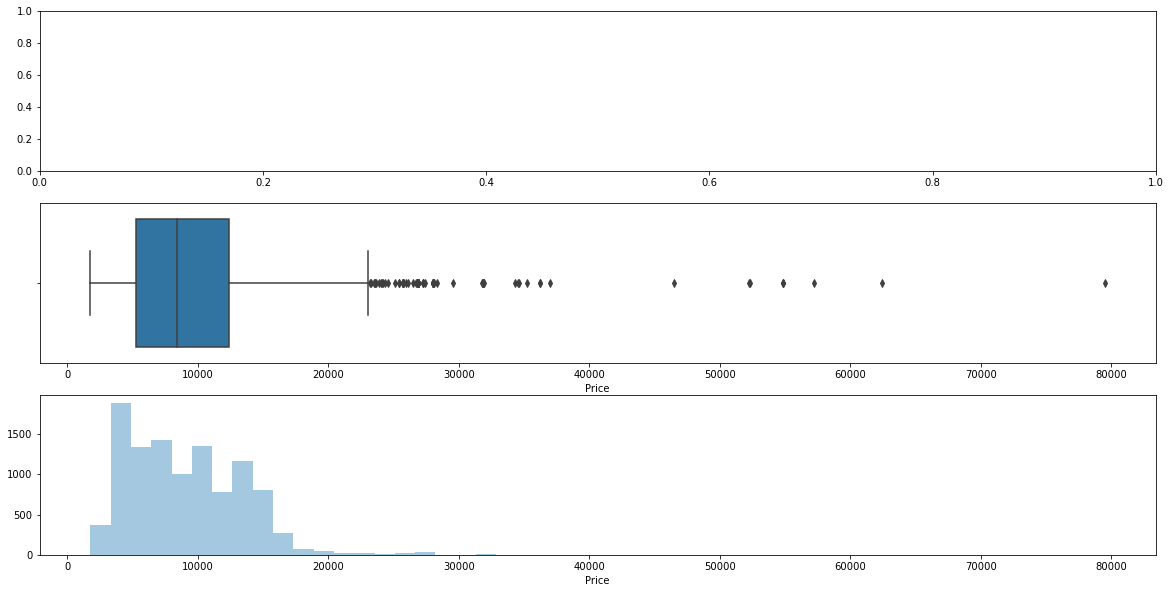

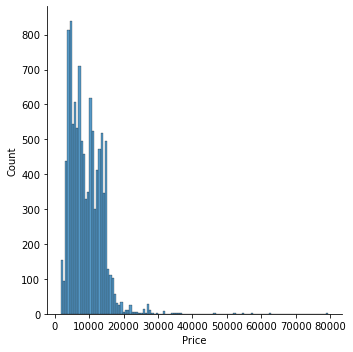

In [306]:
plot(data,'Price')

In [307]:
np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

array([ 3897.,  7662., 13882., ...,  7229., 12648., 11753.])

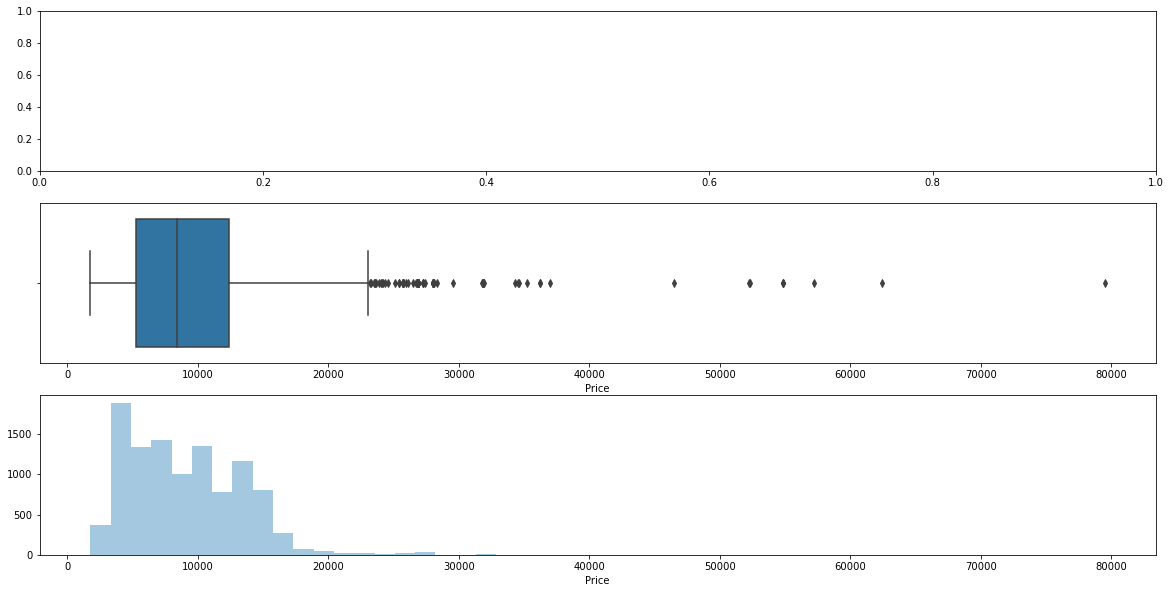

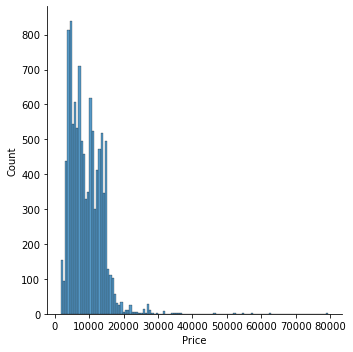

In [308]:
plot(data,'Price')

In [309]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hours,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2019-03-24,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,2,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,7,0,1,0,0,0


In [310]:
data.drop(columns=['Source','Duration'],axis=1,inplace=True)

In [311]:
data.head(2)

,Airline,Date_of_Journey,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hours,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2019-03-24,2,0,3897,24,3,22,20,1,10,2,1,0,0,0,0
1,7,2019-01-05,3,2,7662,5,1,5,50,13,15,7,0,1,0,0,0


In [312]:
data.dtypes

Airline                         int64
Date_of_Journey        datetime64[ns]
Destination                     int64
Total_Stops                     int64
Price                           int64
Journey_day                     int64
Journey_month                   int64
Dep_Time_hour                   int64
Dep_Time_minute                 int64
Arrival_Time_hour               int64
Arrival_Time_minute             int64
duration_hours                  int64
SourceBanglore                  int64
SourceKolkata                   int64
SourceDelhi                     int64
SourceChennai                   int64
SourceMumbai                    int64
dtype: object

In [313]:
data.drop(columns=['Date_of_Journey','Journey_day','Journey_month'],axis=1,inplace=True)

In [314]:
data.head(2)

,Airline,Destination,Total_Stops,Price,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hours,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2,0,3897,22,20,1,10,2,1,0,0,0,0
1,7,3,2,7662,5,50,13,15,7,0,1,0,0,0


In [315]:
data.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
Price                  int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
duration_hours         int64
SourceBanglore         int64
SourceKolkata          int64
SourceDelhi            int64
SourceChennai          int64
SourceMumbai           int64
dtype: object

In [316]:
from sklearn.feature_selection import mutual_info_regression

In [317]:
x=data.drop(['Price'],axis=1)

In [318]:
y=data['Price']

In [319]:
x.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
duration_hours         int64
SourceBanglore         int64
SourceKolkata          int64
SourceDelhi            int64
SourceChennai          int64
SourceMumbai           int64
dtype: object

In [320]:
mutual_info_regression(x,y)

array([0.97821823, 1.005216  , 0.79080681, 0.33859786, 0.2591085 ,
       0.40811292, 0.34201957, 0.46035722, 0.38710277, 0.45991629,
       0.52172335, 0.13409674, 0.20562079])

In [321]:
imp=pd.DataFrame(mutual_info_regression(x,y),index=x.columns)
imp

,0
Airline,0.977114
Destination,1.000289
Total_Stops,0.790075
Dep_Time_hour,0.349699
Dep_Time_minute,0.254357
Arrival_Time_hour,0.398814
Arrival_Time_minute,0.345917
duration_hours,0.461081
SourceBanglore,0.386912
SourceKolkata,0.459311


In [322]:
imp.columns=['importance']

In [323]:
imp.sort_values(by='importance',ascending=False)

,importance
Destination,1.000289
Airline,0.977114
Total_Stops,0.790075
SourceDelhi,0.531007
duration_hours,0.461081
SourceKolkata,0.459311
Arrival_Time_hour,0.398814
SourceBanglore,0.386912
Dep_Time_hour,0.349699
Arrival_Time_minute,0.345917


Test and Train data for building ML
Scaling Data

In [324]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state=42)

In [325]:
from sklearn.ensemble import RandomForestRegressor

In [326]:
ml_model=RandomForestRegressor()

In [327]:
ml_model.fit(x_train,y_train)

RandomForestRegressor()

In [328]:
y_pred = ml_model.predict(x_test)

In [329]:
y_pred

array([13874.05505044,  5690.90775823, 12617.28105939, ...,
        3790.65765596,  7500.56558686, 10994.2861877 ])

In [330]:
y_pred.shape

(2671,)

In [331]:
len(x_test)

2671

In [332]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [333]:
import pickle

In [334]:
file = open(r'E:\Python_ML_projects\Project 3_Flight price/rf_random.pkl','wb')

In [335]:
pickle.dump(ml_model,file)

In [336]:
model=open(r'E:\Python_ML_projects\Project 3_Flight price/rf_random.pkl','rb')

In [337]:
forest=pickle.load(model)

In [338]:
forest.predict(x_test)

array([13874.05505044,  5690.90775823, 12617.28105939, ...,
        3790.65765596,  7500.56558686, 10994.2861877 ])

Automate ML pipeline

In [339]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs(y_true-y_pred)/(y_true))*100

In [340]:
mape(y_test,forest.predict(x_test))

18.588021955739233

In [341]:
def predict(ml_model):
    model=ml_model.fit(x_train,y_train)
    print ('Training_score:{}'.format(model.score(x_train,y_train)))
    y_prediction=model.predict(x_test)
    print ('Predictions are{}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print ('r2_score:{}'.format(r2_score))
    print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
    print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))
    print('MAPE:', mape(y_test, y_prediction))
    sns.displot(y_test-y_prediction)

Training_score:0.7927246772245093
Predictions are[13905.69232969  5682.34627225 12718.44219858 ...  3798.09605195
  7570.72991597 10932.00778842]


r2_score:0.5727969412878215
MAE: 1697.8495110069948
MSE: 8726637.05647614
RMSE: 2954.0881937538934
MAPE: 18.58936520446311


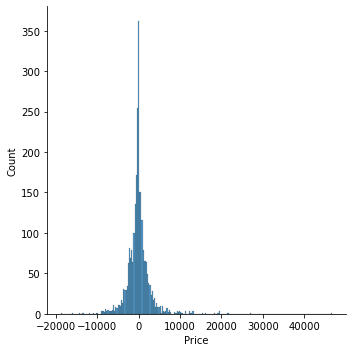

In [342]:
    predict(RandomForestRegressor())

In [343]:
from sklearn.model_selection import RandomizedSearchCV

In [344]:
reg_rf=RandomForestRegressor()

In [345]:
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [346]:
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]
max_features=["auto","sqrt"]
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]
min_samples_split=[5,10,15,100]

In [347]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
    
}

In [348]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [349]:
rf_random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [350]:
rf_random

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [351]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [352]:
rf_random.best_params_

{'n_estimators': 1040,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [353]:
pred2=rf_random.predict(x_test)

In [354]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.6113242745383165

In [355]:
# Model Training and Testing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRFRegressor

In [356]:
lr=LinearRegression()

knn = KNeighborsRegressor(n_neighbors=10)

dt = DecisionTreeRegressor(max_depth = 3)

rf = RandomForestRegressor(max_depth = 3, n_estimators=500)

ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

In [357]:
# Testing with linear regression
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred)
r1

0.49951349704662906

In [358]:
# Testing with KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.5744069192115119

In [359]:
# Testing with DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
from sklearn.metrics import r2_score
r3 = r2_score(y_test,y_pred)
r3

0.48967848153775473

In [360]:
# Testing with RandomForestRegressor
rf = RandomForestRegressor(max_depth = 3, n_estimators=500)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
from sklearn.metrics import r2_score
r4 = r2_score(y_test,y_pred)
r4

0.4912758290289976

In [361]:
# Testing with AdaBoostRegressor
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
ada.fit(x_train,y_train)

y_pred = ada.predict(x_test)
from sklearn.metrics import r2_score
r5 = r2_score(y_test,y_pred)
r5

0.4831249938898453

In [362]:
# Testing with GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
gbr.fit(x_train,y_train)

y_pred = gbr.predict(x_test)
from sklearn.metrics import r2_score
r6 = r2_score(y_test,y_pred)
r6

0.607470699207163

In [363]:
# Model Results
metric_results= {'Model': ['linear Regression', 'KNeighbors', 'Decision Tree','RandomForest','AdaBoost','GradientBoosting'], 
                 'R Square': [r1, r2, r3,r4,r5,r6]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R Square
0,linear Regression,0.499513
1,KNeighbors,0.574407
2,Decision Tree,0.489678
3,RandomForest,0.491276
4,AdaBoost,0.483125
5,GradientBoosting,0.607471


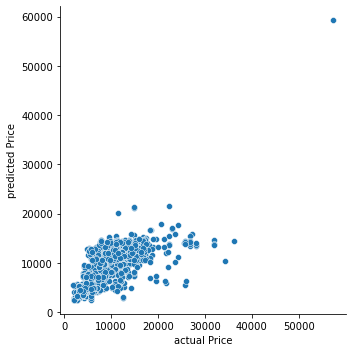

In [364]:
prediction= pd.DataFrame({'actual Price': y_test, 'predicted Price': y_pred})
sns.relplot(data=prediction, x='actual Price', y='predicted Price')

In [365]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1894.1769749947584
MSE: 8018343.202826394
RMSE: 2831.667918882155
